In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# PARAMETERS defined by users.
# the input/output path should be pre-defined.
np.set_printoptions(threshold=sys.maxsize)
project_name = "example"
path_of_occupancy = './data/occupancy_data.xlsx'
path_of_gene_expression = './data/gene_expression.xlsx'
path_of_output = './output/'
name_of_output = project_name

binding_data = pd.read_excel(path_of_occupancy).values
binding_txt = pd.read_excel(path_of_occupancy).iloc[:,0:2].values
binding_txt = [[text.upper() for text in text_arr] for text_arr in binding_txt]
exp_datafiles = path_of_gene_expression

time_intervals = [1, 1, 2, 2, 4, 4, 2]
KO_sheets = ['TF_exp']

orig_gene_exp_data = {}
orig_gene_txt = {}
orig_TF_exp_data = {}
orig_TF_txt = {}
orig_genes = {}
time_points = {}
sample_hours = {}

for i in range(1):
    orig_gene_exp_data[i], orig_gene_txt[i] = pd.read_excel(exp_datafiles, sheet_name='Gene_exp').iloc[:,1:].values, pd.read_excel(exp_datafiles, sheet_name='Gene_exp').iloc[:,0].values
    orig_gene_exp_data[i] = orig_gene_exp_data[i][:, :]
    orig_TF_txt[i] = {}
    orig_TF_exp_data[i] = {}
    for j in range(len(KO_sheets)):
        some_res_exp, some_res_TF = pd.read_excel(exp_datafiles, sheet_name=KO_sheets[j]).iloc[:,1:].values, pd.read_excel(exp_datafiles, sheet_name=KO_sheets[j]).iloc[:,0].values
        orig_TF_exp_data[i][j], orig_TF_txt[i][j] = some_res_exp, some_res_TF
    orig_genes[i] = orig_gene_txt[i][:]
    time_points[i] = orig_gene_exp_data[i].shape[1]

    sample_hours[i] = time_points[i] * time_intervals[i]

cyclic_genes = []
def is_cyclic_with_similarity(array1, array2, name='', threshold=0.8):
    correlation = np.corrcoef(array1, array2)[0, 1]
    # if correlation>=threshold:
    #     plt.plot(array1, label='Array 1')
    #     plt.plot(array2, label='Array 2')
    #     plt.title(name)
    #     plt.show()
    return correlation

gene_exp = {}
for i, gen_name in enumerate(orig_gene_txt[0]):
    gene_exp[gen_name] = [(orig_gene_exp_data[0][i][j] + orig_gene_exp_data[0][i][24+j])/2 for j in range(24)]
    correlation = is_cyclic_with_similarity(orig_gene_exp_data[0][i][:24], orig_gene_exp_data[0][i][24:], gen_name)
    if correlation > 0.5:
        cyclic_genes.append(gen_name)


TF_exp = {}
for i, TF_name in enumerate(orig_TF_txt[0][0]):
    TF_exp[TF_name] = [(orig_TF_exp_data[0][0][i][j] + orig_TF_exp_data[0][0][i][24+j])/2 for j in range(24)]
    # print(is_cyclic_with_similarity(orig_TF_exp_data[0][0][i][:24], orig_TF_exp_data[0][0][i][24:], TF_name), TF_name)
    # plt.plot(orig_TF_exp_data[0][0][i][:24], label='1 day')
    # plt.plot(orig_TF_exp_data[0][0][i][24:], label='2 day')
    # plt.plot(TF_exp[TF_name], label='average')
    # plt.title(TF_name)
    # plt.show()
    # TF_exp[TF_name] = TF_exp[TF_name][-3:]+TF_exp[TF_name][:-3]
    print(TF_exp[TF_name])
    # TF_exp[TF_name] = list(np.roll(TF_exp[TF_name],3))
    print(TF_exp[TF_name])

print(len(cyclic_genes))










[7.975674203480455, 8.04553530444963, 8.29968405660202, 8.1851539623972, 8.232089588347787, 8.404657694621925, 8.446586740470565, 8.27149245729546, 8.406994266394534, 8.19895171588395, 8.174129750602951, 7.906403480571035, 7.73602772311418, 7.912822679161074, 7.40041460269739, 6.941131038032325, 6.94055333366074, 7.12608462239714, 7.106347577755004, 7.49469055834665, 7.74405638841042, 7.8790086952637, 7.812205547205554, 7.9092870920550755]
[7.975674203480455, 8.04553530444963, 8.29968405660202, 8.1851539623972, 8.232089588347787, 8.404657694621925, 8.446586740470565, 8.27149245729546, 8.406994266394534, 8.19895171588395, 8.174129750602951, 7.906403480571035, 7.73602772311418, 7.912822679161074, 7.40041460269739, 6.941131038032325, 6.94055333366074, 7.12608462239714, 7.106347577755004, 7.49469055834665, 7.74405638841042, 7.8790086952637, 7.812205547205554, 7.9092870920550755]
[8.129208209688304, 8.41499794888861, 8.479512615459669, 8.73430033428623, 8.594231235929435, 8.63675172141589, 

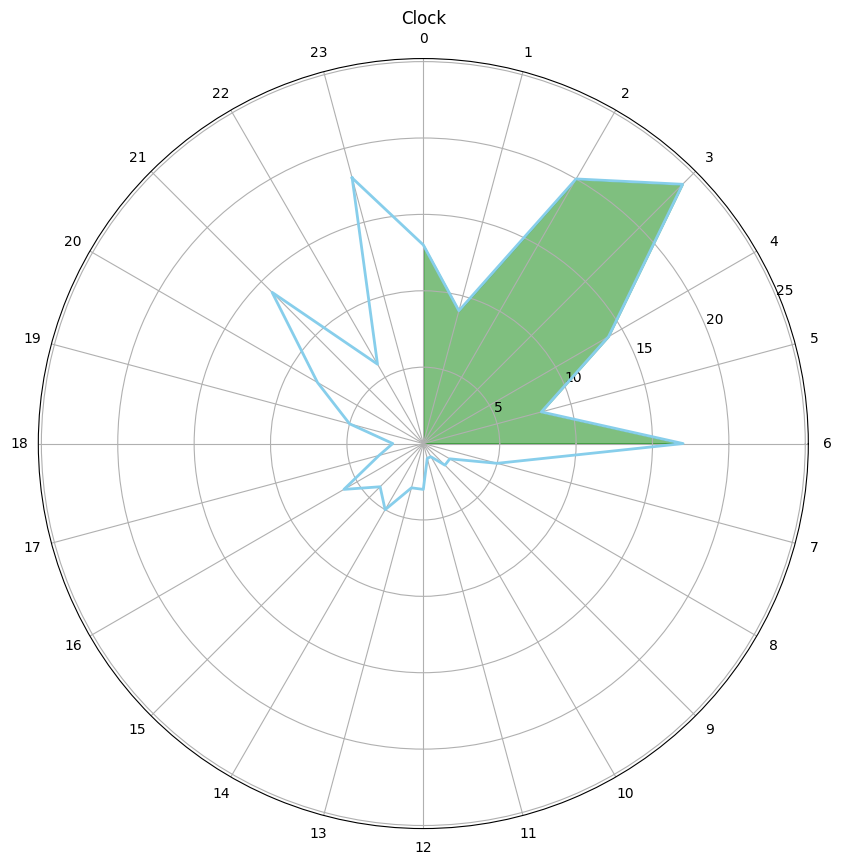

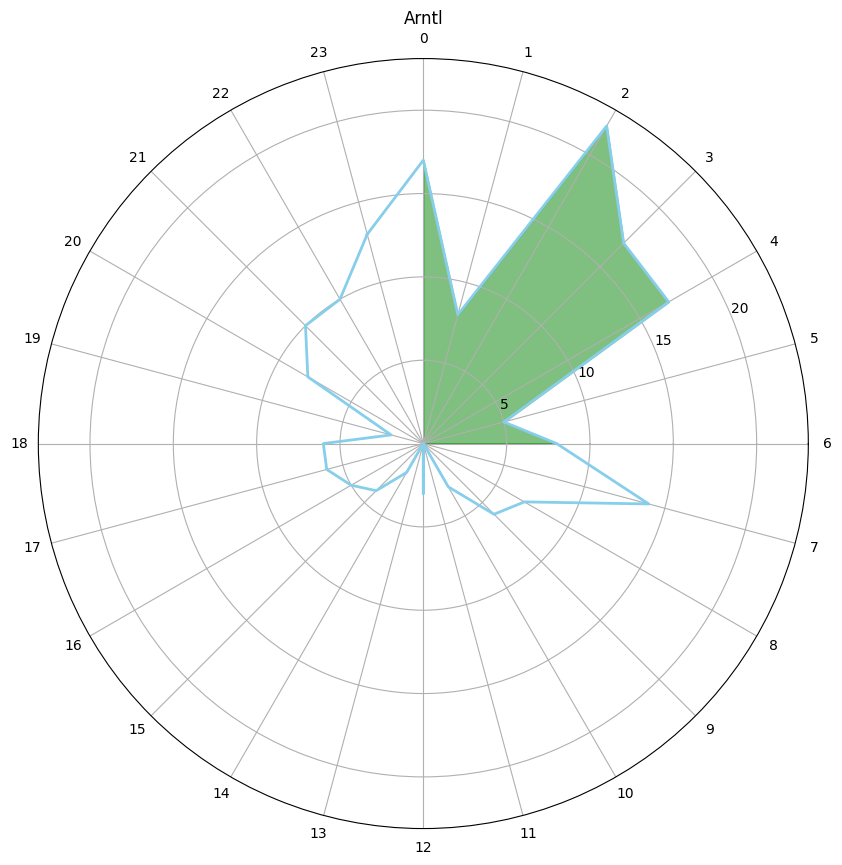

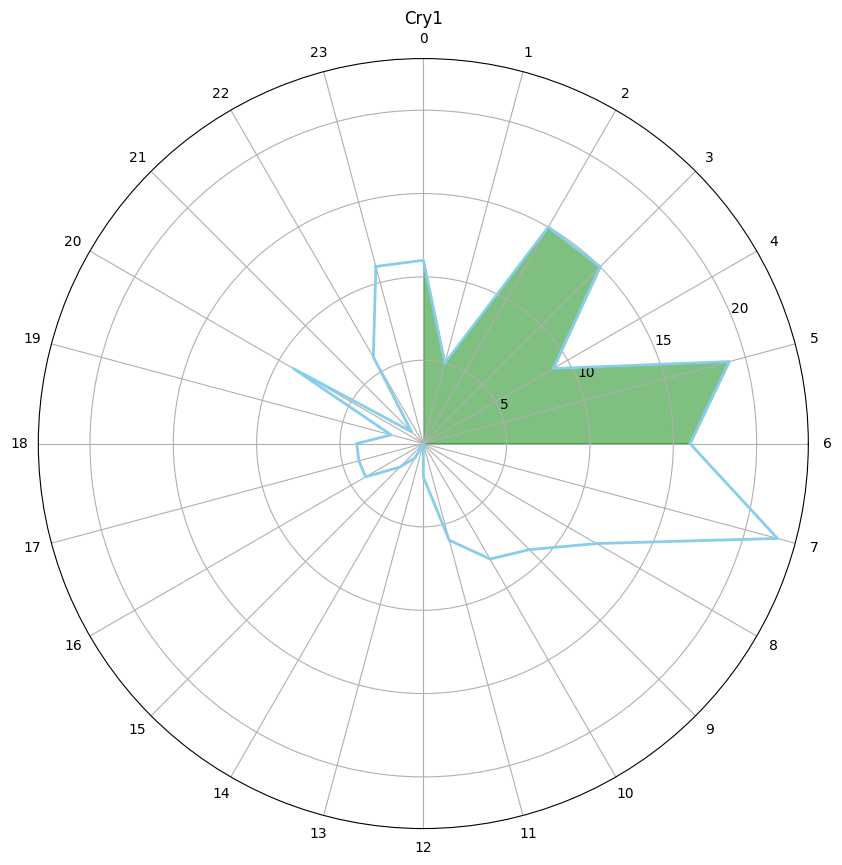

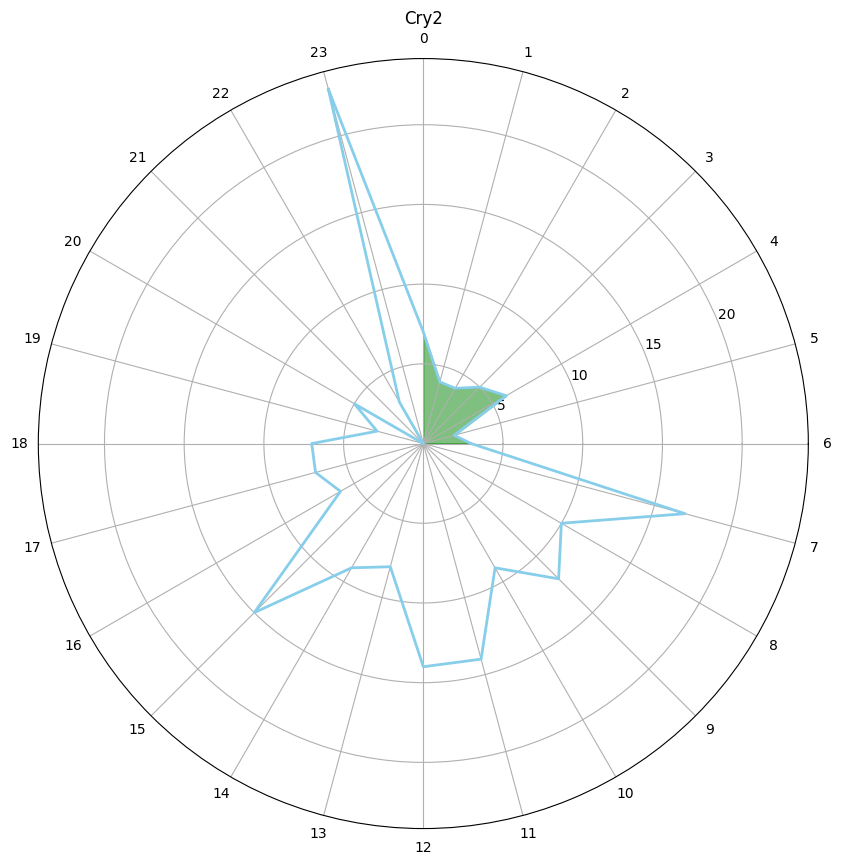

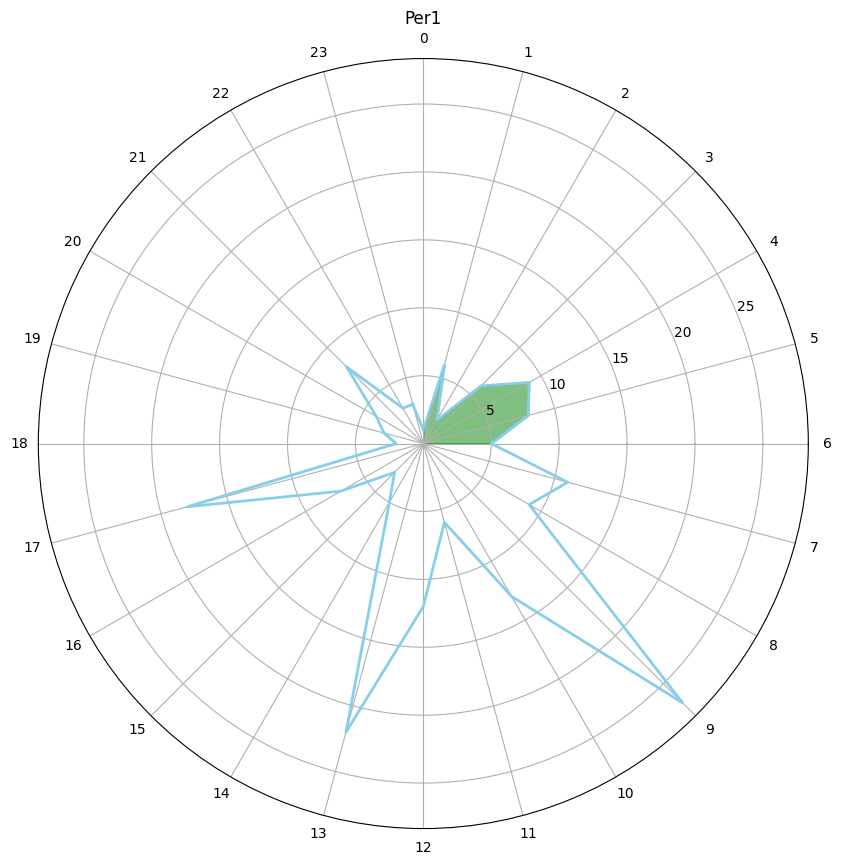

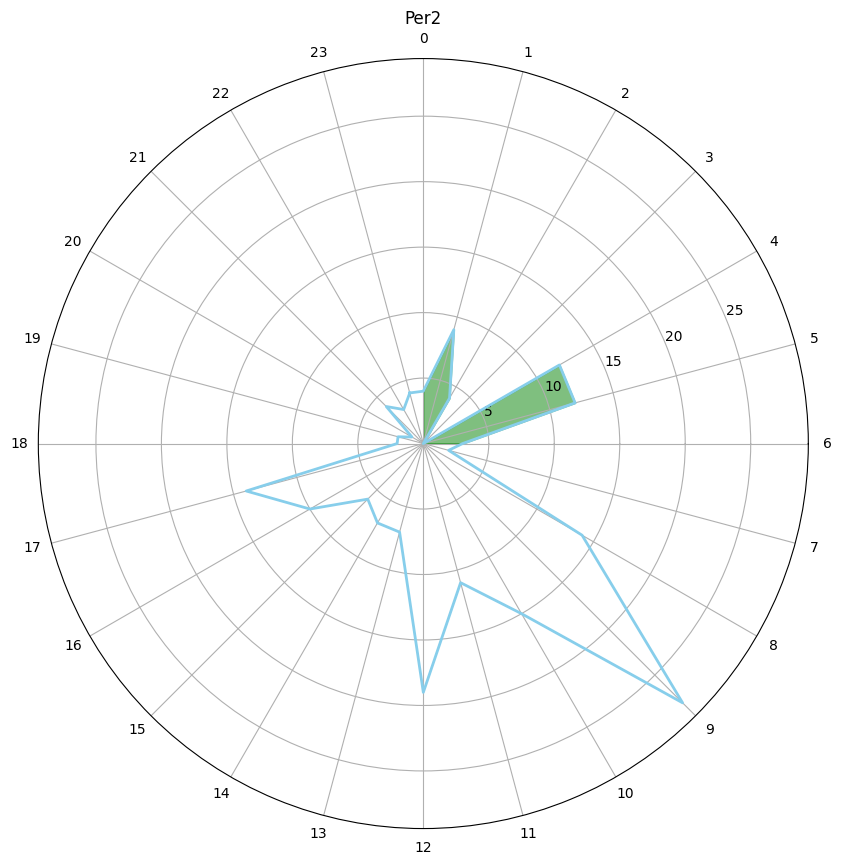

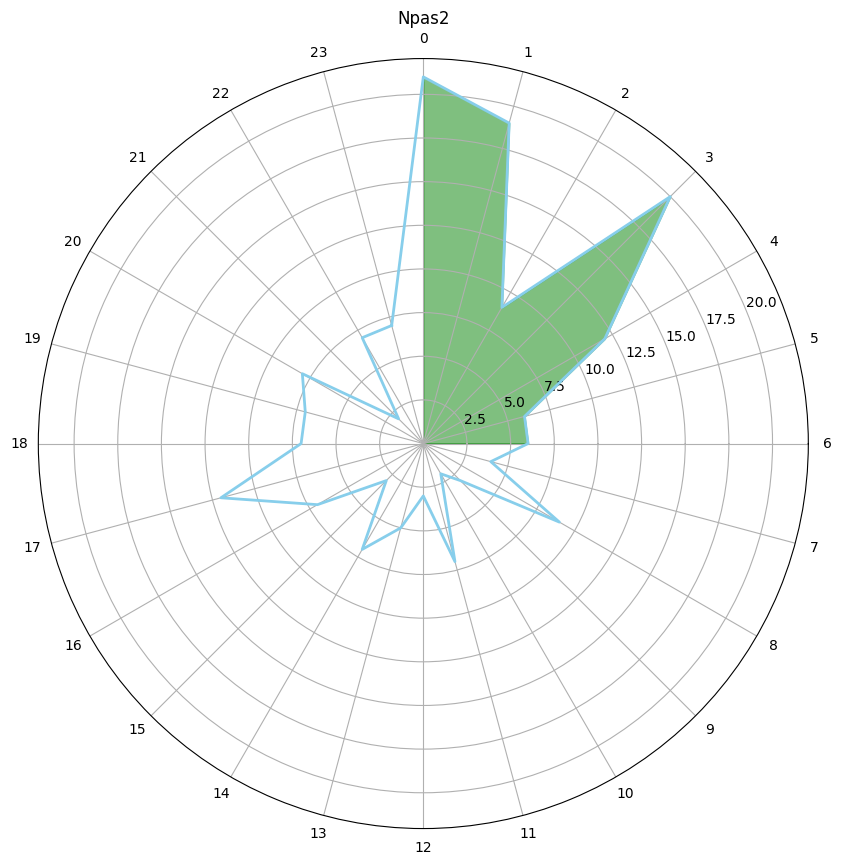

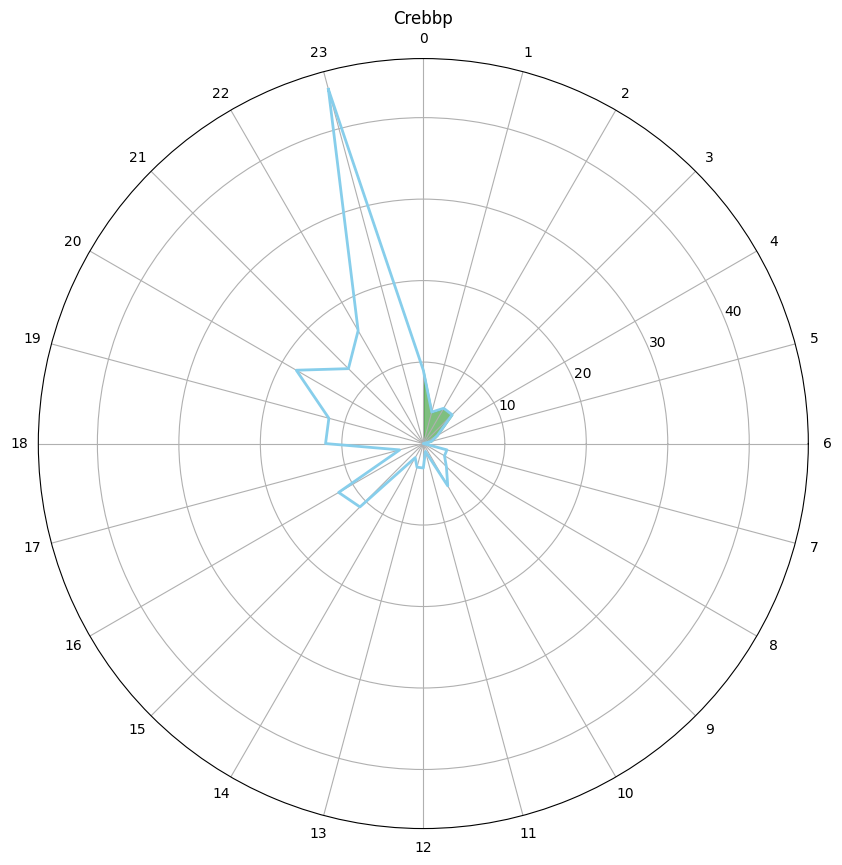

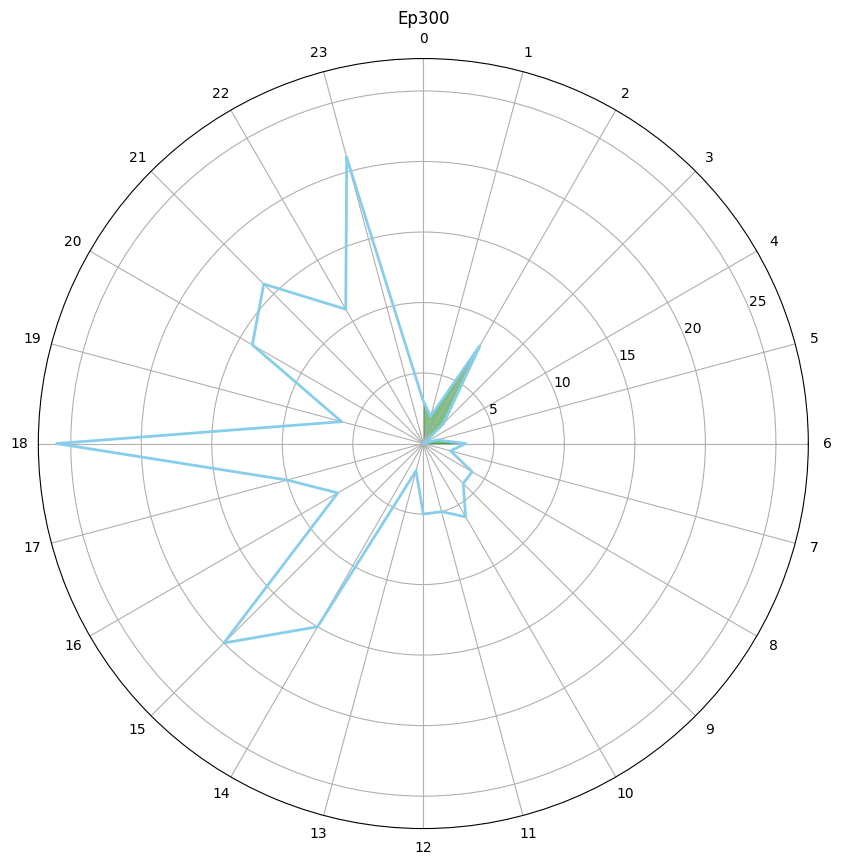

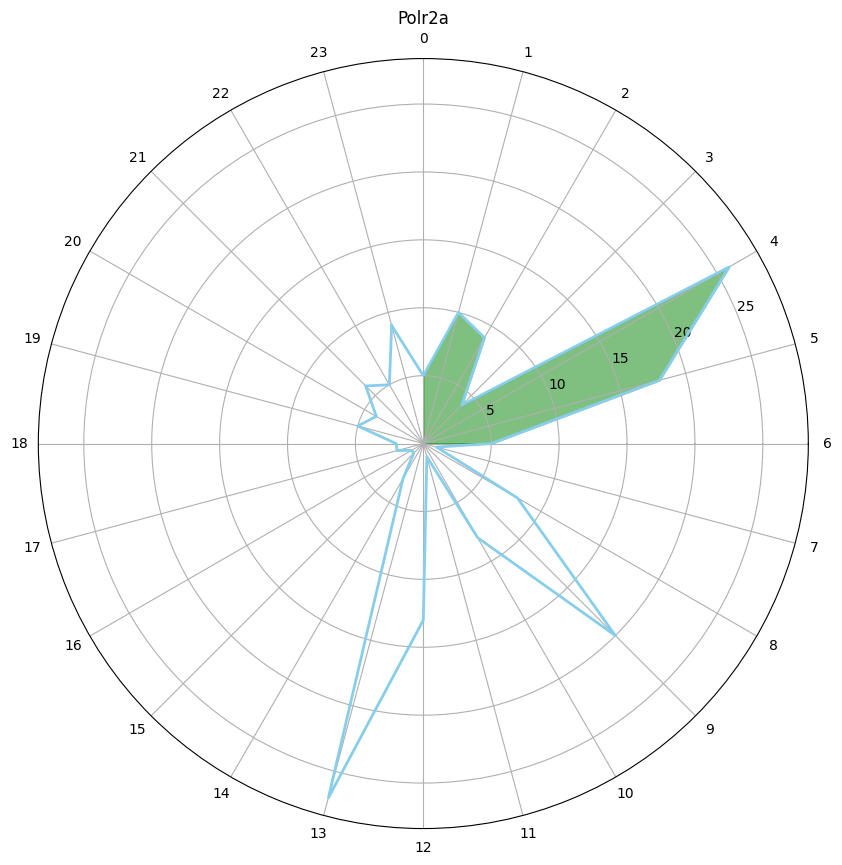

In [10]:
def is_cyclic_with_similarity(array1, array2, name='', threshold=0.99):
    correlation = np.corrcoef(array1, array2)[0, 1]
    if correlation>=threshold:
        plt.plot(array1, label='Array 1')
        plt.plot(array2, label='Array 2')
        plt.title(correlation)
        print(name)
        plt.show()
    return correlation


for TF in TF_exp:
    factor_exp = TF_exp[TF]
    cycle_diagram = [0]*24
    for gene in cyclic_genes:
        max_corr, idx = 0, 0
        for i in range(24):
            # print(len(gene_exp[gene]), len(factor_exp[i:]+factor_exp[:i]))
            corr = is_cyclic_with_similarity(gene_exp[gene], factor_exp[i:]+factor_exp[:i], gen_name)
            if corr > max_corr:
                max_corr = corr
                idx = i
        cycle_diagram[idx]+=1
    
    hours = [i for i in reversed(range(24))]

    # Конвертируем ключи в радианы, смещая 0 часов к верху
    angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False).tolist()
    angles = angles[7:] + angles[:7]  # Смещаем нулевой час наверх

    # Создаём поле для графика
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Строим линию, красный цвет для диапазона от 0 до 6 часов
    ax.plot([*angles,angles[0]], [*cycle_diagram,cycle_diagram[0]], linewidth=2, linestyle='-', color='skyblue')
    ax.fill_between(angles[17:], 0, cycle_diagram[17:], color='green', alpha=0.5)  # Закрашиваем диапазон красным

    # Добавляем метки (часы)
    ax.set_xticks(angles)
    ax.set_xticklabels(hours)

    # Добавляем заголовок
    plt.title(TF)

    # Отображаем график
    plt.show()


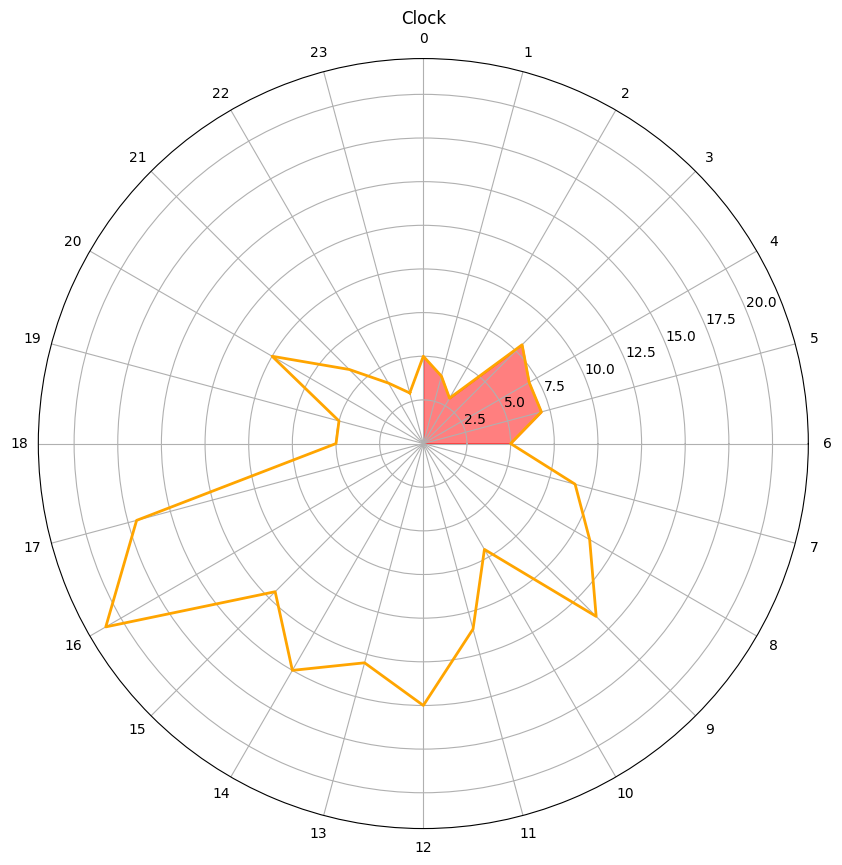

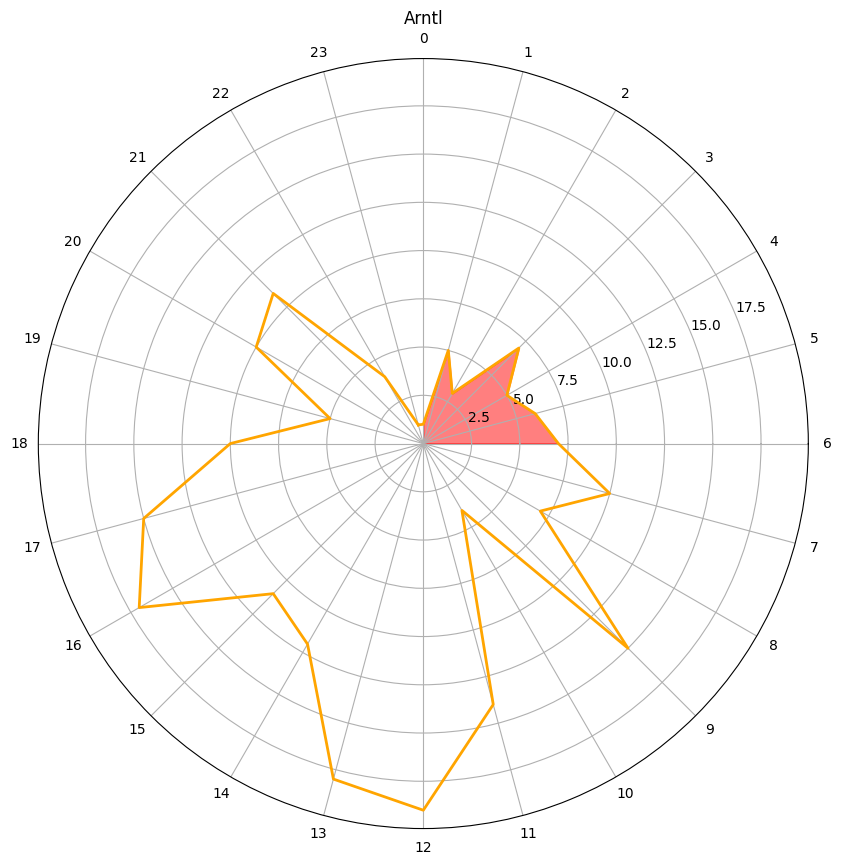

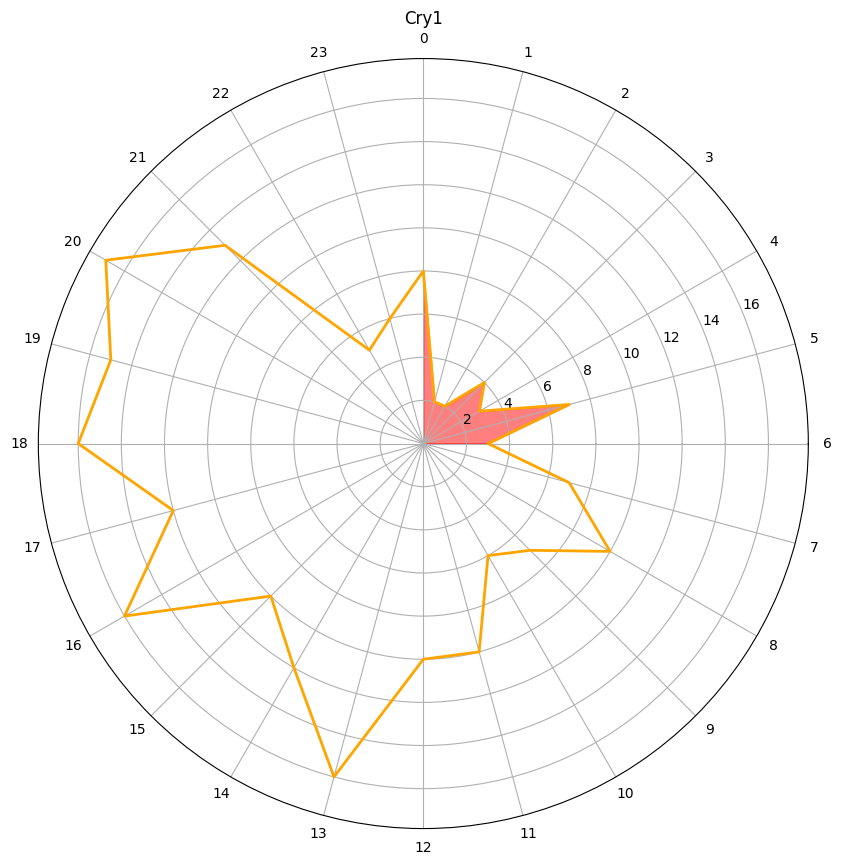

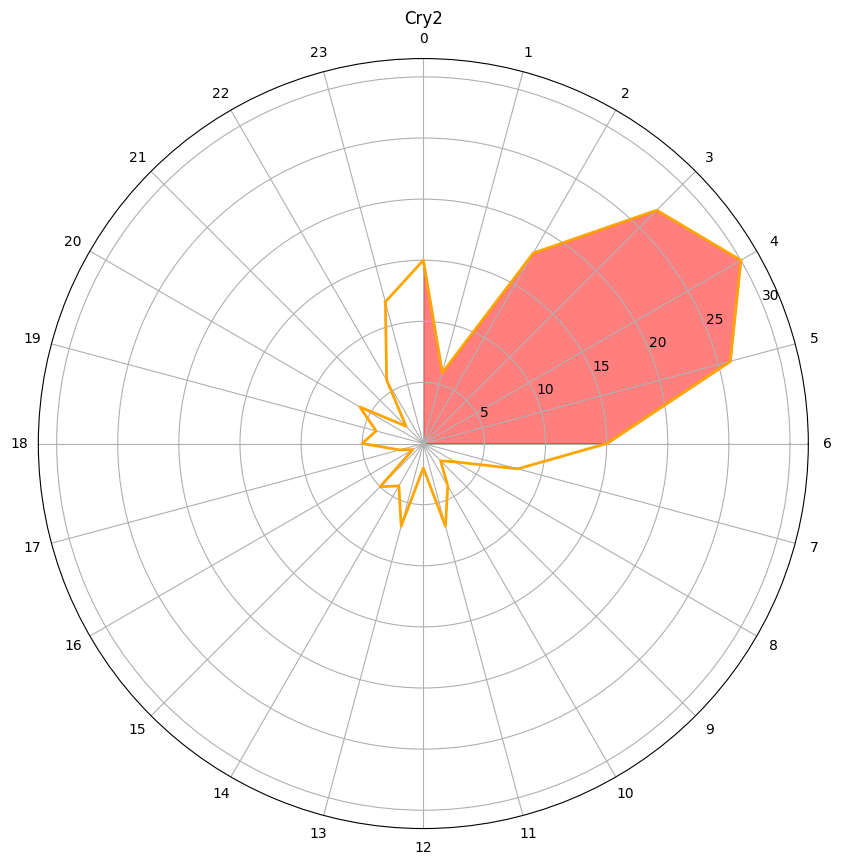

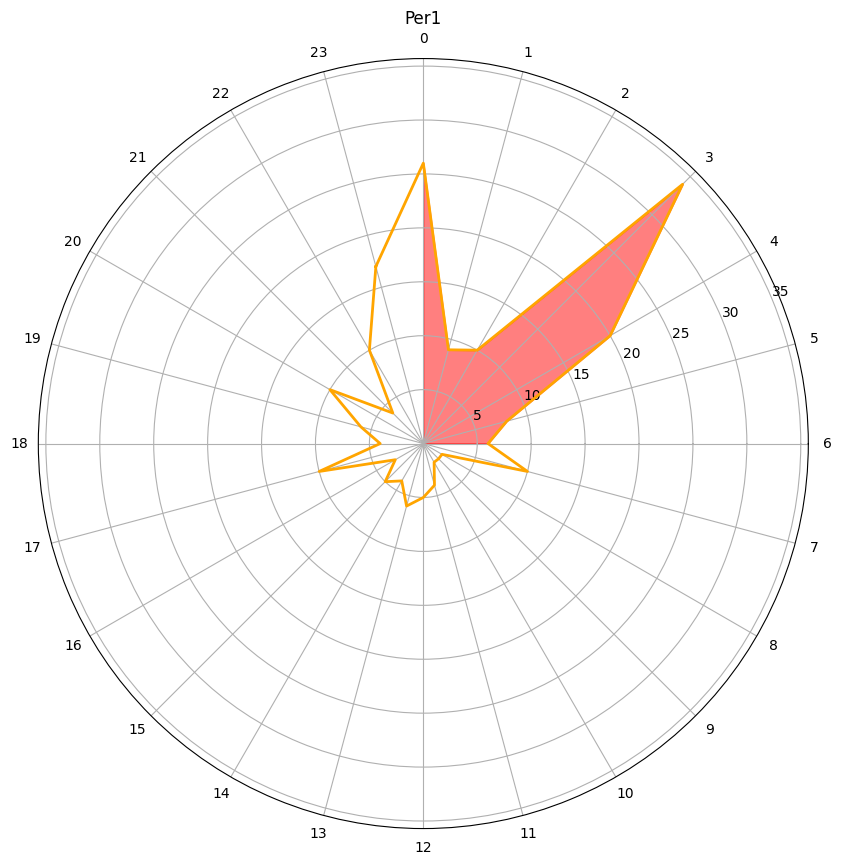

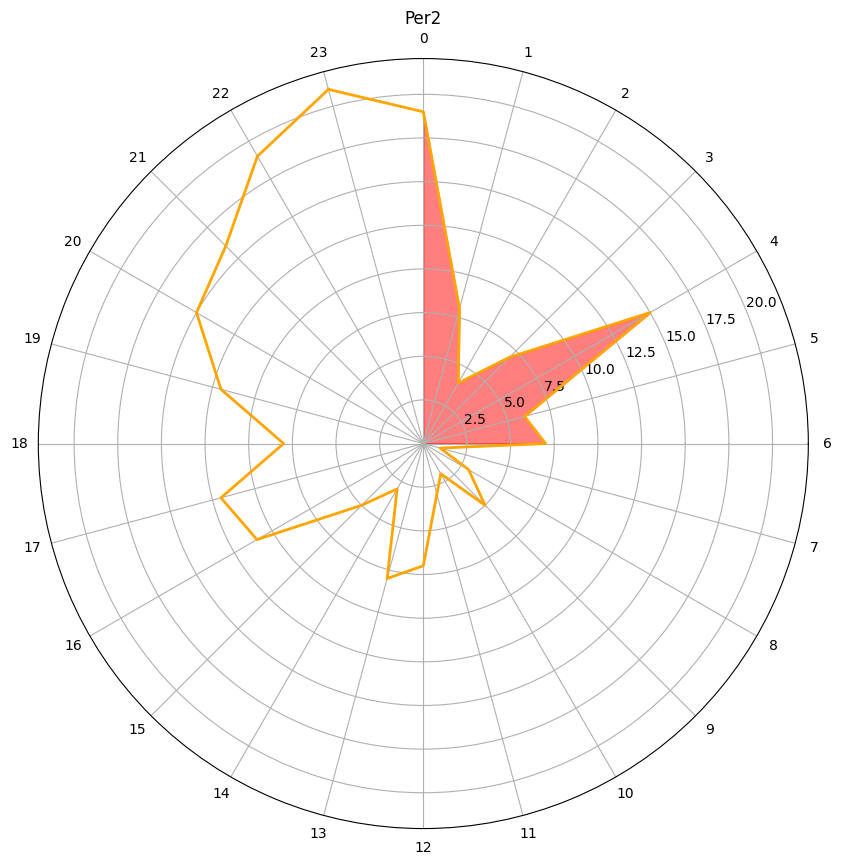

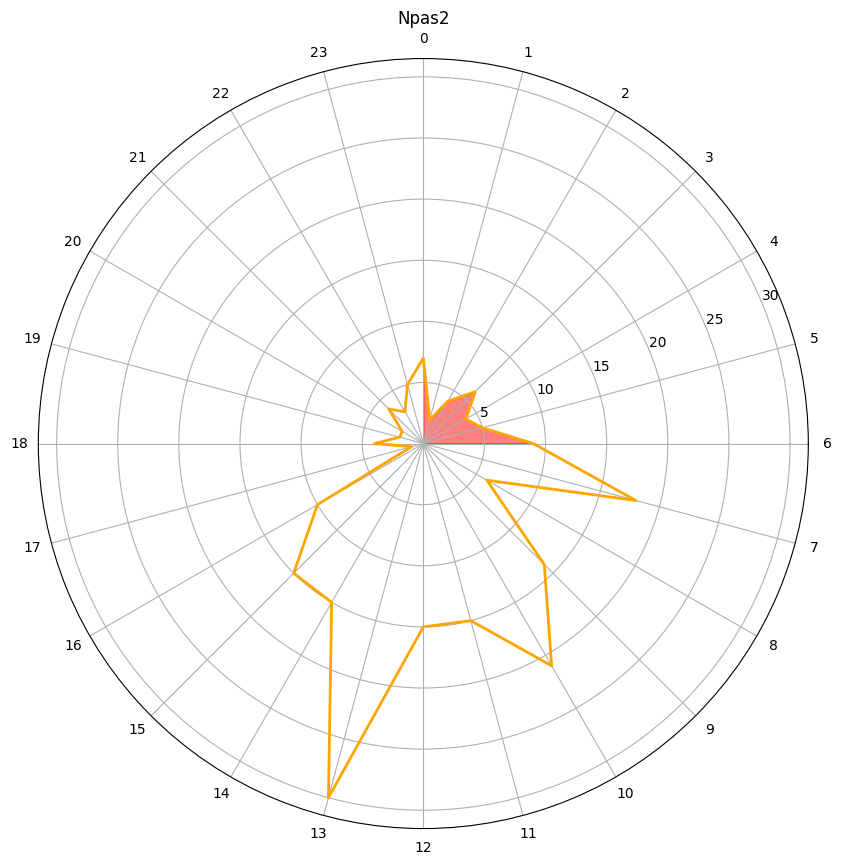

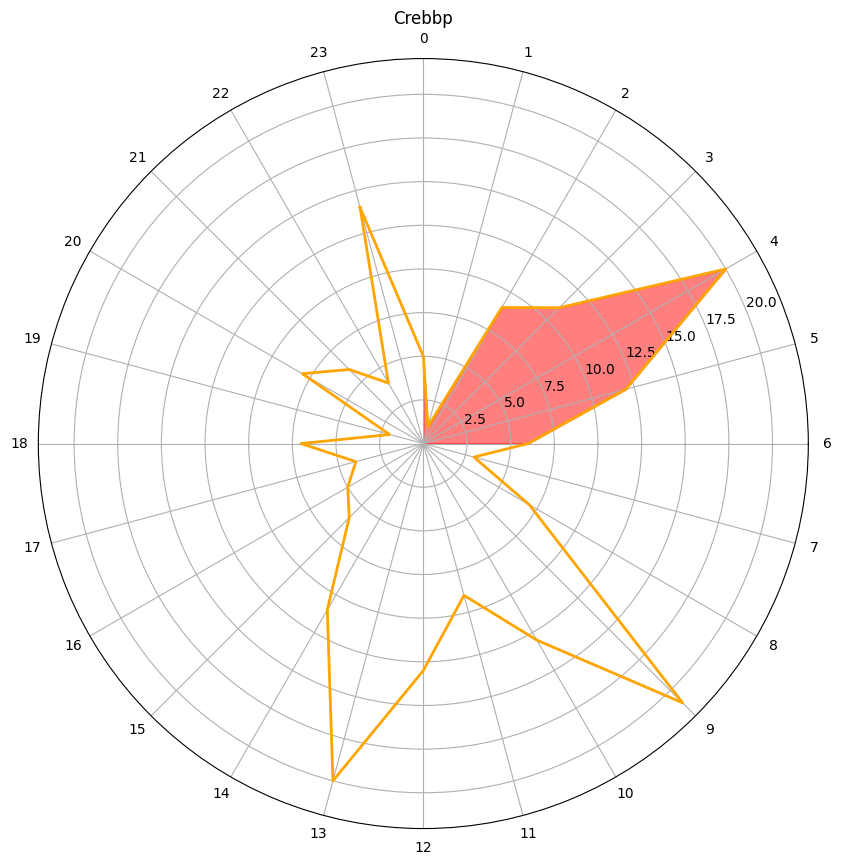

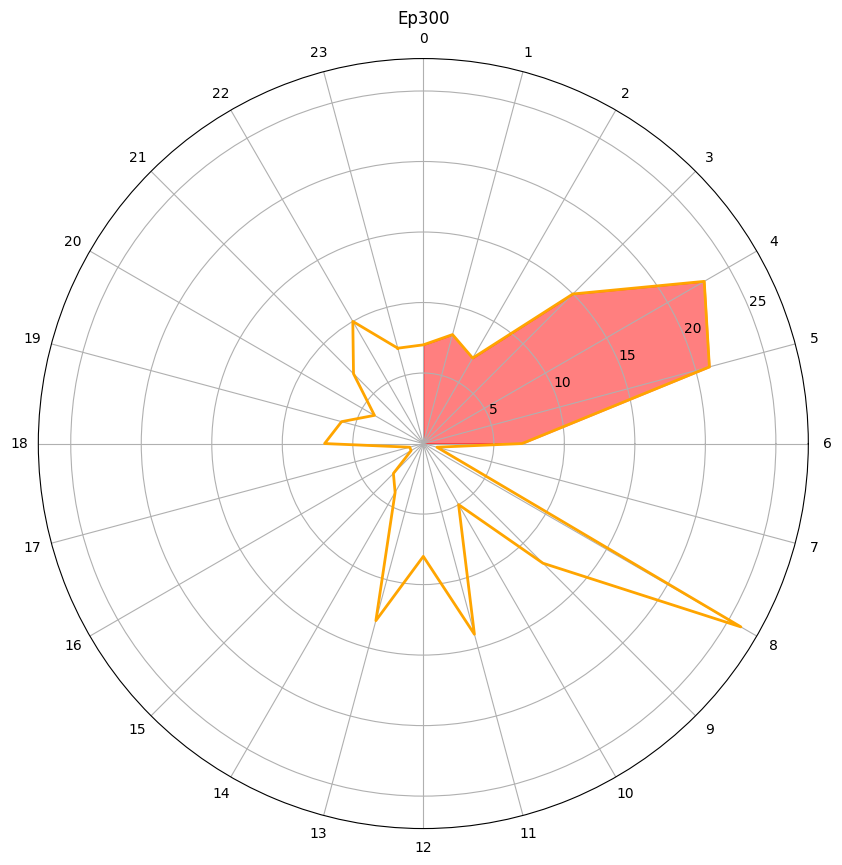

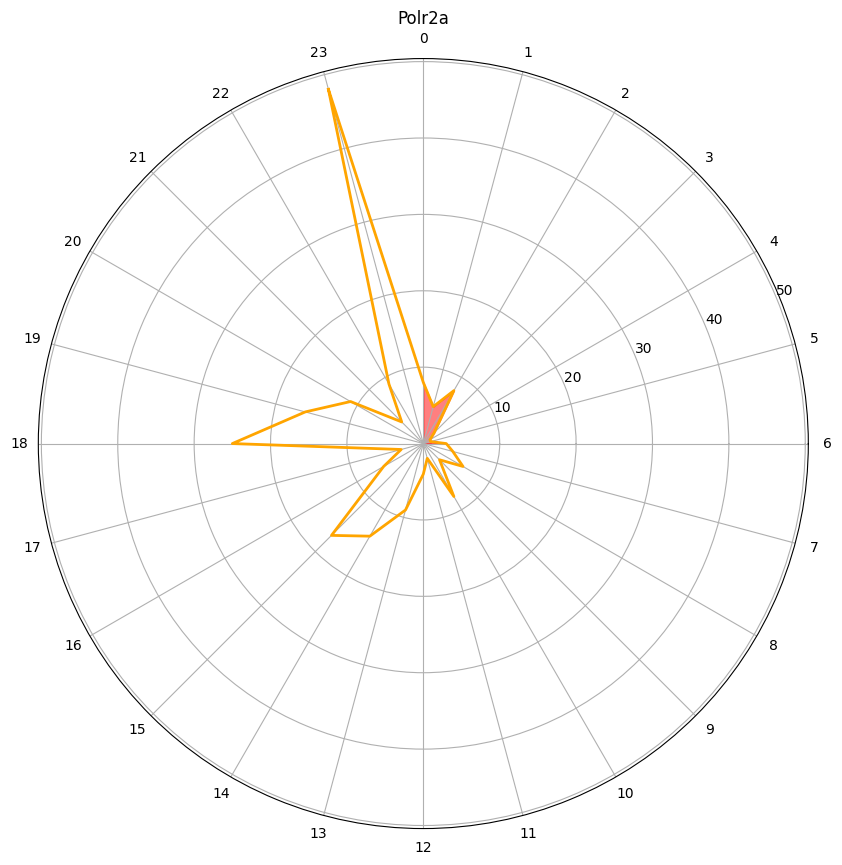

In [11]:
# считаем если отрицательное влияние

def is_cyclic_with_similarity(array1, array2, name='', threshold=0.99):
    correlation = np.corrcoef(array1, array2)[0, 1]
    if correlation>=threshold:
        plt.plot(array1, label='Array 1')
        plt.plot(array2, label='Array 2')
        plt.title(correlation)
        print(name)
        plt.show()
    return correlation


for TF in TF_exp:
    factor_exp = TF_exp[TF]
    cycle_diagram = [1]*24
    for gene in cyclic_genes:
        min_corr, idx = 1, 0
        for i in range(24):
            # print(len(gene_exp[gene]), len(factor_exp[i:]+factor_exp[:i]))
            corr = is_cyclic_with_similarity(gene_exp[gene], factor_exp[i:]+factor_exp[:i], gen_name)
            if corr < min_corr:
                min_corr = corr
                idx = i
        # print(min_corr)
        cycle_diagram[idx]+=1
    
    hours = [i for i in reversed(range(24))]

    # Конвертируем ключи в радианы, смещая 0 часов к верху
    angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False).tolist()
    angles = angles[7:] + angles[:7]  # Смещаем нулевой час наверх

    # Создаём поле для графика
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Строим линию, красный цвет для диапазона от 0 до 6 часов
    ax.plot([*angles,angles[0]], [*cycle_diagram,cycle_diagram[0]], linewidth=2, linestyle='-', color='orange')
    ax.fill_between(angles[17:], 0, cycle_diagram[17:], color='red', alpha=0.5)  # Закрашиваем диапазон красным

    # Добавляем метки (часы)
    ax.set_xticks(angles)
    ax.set_xticklabels(hours)

    # Добавляем заголовок
    plt.title(TF)

    # Отображаем график
    plt.show()